In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Importing the dataset
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Features of boston
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
# Number of rooms is the independent value
x_p = boston.data[:,np.newaxis,5]
x_p

In [0]:
# Price is the dependent value
y_p = boston.target
y_p

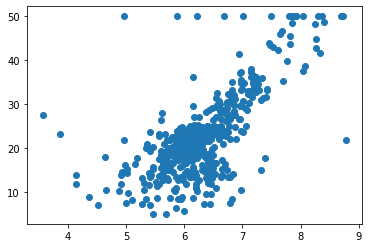

In [7]:
plt.scatter(x_p, y_p)
plt.show()

In [0]:
x_train_p,x_test_p,y_train_p,y_test_p = train_test_split(x_p,y_p,test_size=0.2)

In [0]:
# Calling the model, 2 degrees of freedom because 
# (k+1) , where k is the number of parameters
pol_reg = PolynomialFeatures(degree =2)

In [0]:
# Calculating x according the degrees of freedom
x_train_poli=pol_reg.fit_transform(x_train_p)
x_test_poli =pol_reg.fit_transform(x_test_p)

In [0]:
# Using a linear regression model
lr = linear_model.LinearRegression()

In [12]:
# Training the model
lr.fit(x_train_poli, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Predicting the values of y
y_pred_pr = lr.predict(x_test_poli)

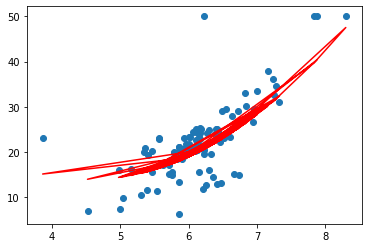

In [21]:
# Ploting the test data and the model
plt.scatter(x_test_p, y_test_p)
plt.plot(x_test_p, y_pred_pr, color= 'red')
plt.show()

In [23]:
# Coefs of our model
lr.coef_

array([  0.        , -21.91392015,   2.40323994])

In [24]:
# The intercept of our model
lr.intercept_

63.902957991279386

In [25]:
# The R²
lr.score(x_train_poli,y_train_p)

0.5415914249772752

In [49]:
# The model will look like this:
print('price = ',lr.intercept_,' + ',lr.coef_[1],'*rooms + ',lr.coef_[2],'*rooms²')

price =  63.902957991279386  +  -21.91392015343398 *rooms +  2.4032399411196153 *rooms²


In [50]:
 # A simple prediction for 1 value when x = 5
 x1 = 5
 x_new = np.array(x1).reshape(1,-1)
 x_new1 = pol_reg.fit_transform(x_new)
j_p = lr.predict(x_new1)
j_p

array([14.41435575])